<a href="https://colab.research.google.com/github/ommatr/SE-lab2-09-051-all/blob/main/linear_regression_numpy_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Построим приближение синусоиды

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['x_support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['y_support'] = np.sin(data['x_support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['x_support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data
  
data = generate_wave_set(1000, 250)

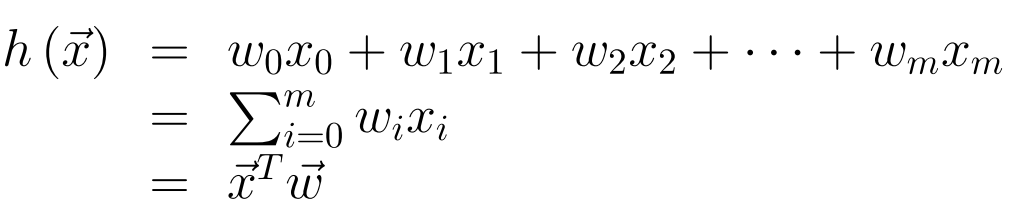

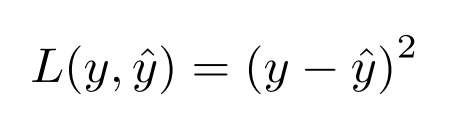

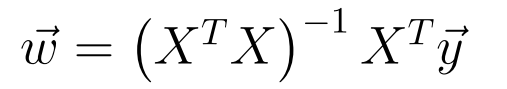

In [ ]:
# добавим колонку единиц к единственному столбцу признаков
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
# перепишем, полученную выше формулу, используя numpy
# шаг обучения - в этом шаге мы ищем лучшую гипотезу h
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
# шаг применения: посчитаем прогноз
y_prediction = np.dot(w, X.T)

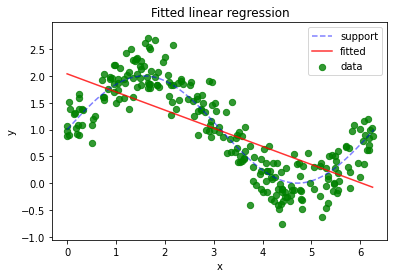

In [ ]:
margin = 0.3
plt.plot(data['x_support'], data['y_support'], 'b--', alpha=0.5, label='support')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.plot(data['x_train'], y_prediction, 'r', alpha=0.8, label='fitted')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 10})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()